# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset, identified as `DANDI:001354` (version `0.250312.0036`), contains single-cell electrophysiological recordings of mouse hippocampal CA1 neurons. These recordings were made in response to the activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs). Neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP, and their responses were recorded during the application of DCZ (100 nM) or DCZ + soluble mCherry (1 uM).

You can find more information about this Dandiset on the DANDI Archive:
[https://dandiarchive.org/dandiset/001354/0.250312.0036](https://dandiarchive.org/dandiset/001354/0.250312.0036)

**Citation:** Klein, Peter (2025) Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation (Version 0.250312.0036) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001354/0.250312.0036

## What this notebook covers

This notebook will guide you through the following steps:
1. Listing required Python packages.
2. Connecting to the DANDI archive and loading basic information about the Dandiset.
3. Listing some of the assets (NWB files) available in the Dandiset.
4. Loading a specific NWB file from the Dandiset.
5. Exploring the metadata and structure of the loaded NWB file.
6. Visualizing some of the electrophysiological data (current clamp responses and stimuli).
7. Providing a summary and potential future directions for analysis.

## Required Packages

To run this notebook, you will need the following Python packages installed:
- `dandi` (for interacting with the DANDI API)
- `pynwb` (for working with NWB files)
- `h5py` (as a dependency for `pynwb` and `remfile`)
- `remfile` (for streaming remote HDF5 files)
- `numpy` (for numerical operations)
- `matplotlib` (for plotting)
- `seaborn` (for enhanced visualizations)

It is assumed that these packages are already installed on your system.

In [1]:
# Import necessary packages
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a seaborn theme for plotting (optional, but makes plots look nicer)
sns.set_theme()

## Loading the Dandiset using the DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset_id = "001354"
dandiset_version = "0.250312.0036"
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Dandiset description: This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

The authors are grateful to the St Jude Children’s Research Hospital Collaborative Research Consortium on GPCRs, the Chan Zuckerberg Biohub–San Francisco, Phil and Penny Knight Initiative for Brain Resilience (KIG-104), Stanford Cancer Institute, Wu Tsai Neurosciences Institute of Stanford University and the NIH (MH135934 to A.Y.T. and I.S., F32CA257159 to N.A.K., NS121106 to I.S.) for funding th

## Loading an NWB file

We will now load one of the NWB files from the Dandiset to explore its contents. We'll select the first asset listed above:

`sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb`

The asset ID for this file is `8609ffee-a79e-498c-8dfa-da46cffef135`.

We will use the `remfile` library along with `pynwb` and `h5py` to stream the NWB file directly from the DANDI archive. The URL for accessing this asset is constructed using its asset ID.

In [3]:
# Define the URL for the specific NWB asset
# This URL corresponds to sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb
nwb_asset_url = "https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/"
asset_id_for_neurosift = "8609ffee-a79e-498c-8dfa-da46cffef135" # Used later for neurosift link

print(f"Loading NWB file from: {nwb_asset_url}")

# Load the remote NWB file
try:
    remote_nwb_file = remfile.File(nwb_asset_url)
    h5_nwb_file = h5py.File(remote_nwb_file, 'r') # Ensure read-only mode
    io_nwb = pynwb.NWBHDF5IO(file=h5_nwb_file, mode='r', load_namespaces=True) # Ensure read-only and load namespaces
    nwbfile = io_nwb.read()
    print("\nNWB file loaded successfully.")
    # We will not display the nwbfile object directly here as it can be very large.
    # Instead, we will explore its components.
except Exception as e:
    print(f"Error loading NWB file: {e}")
    nwbfile = None # Set to None if loading fails

Loading NWB file from: https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file loaded successfully.


## Exploring NWB File Metadata

If the NWB file was loaded successfully, let's explore some of its basic metadata.

In [4]:
if nwbfile:
    print(f"NWBFile Identifier: {nwbfile.identifier}")
    print(f"Session Description: {nwbfile.session_description}")
    print(f"Session Start Time: {nwbfile.session_start_time}")
    print(f"Experimenter(s): {nwbfile.experimenter}")
    print(f"Lab: {nwbfile.lab}")
    print(f"Institution: {nwbfile.institution}")
    if nwbfile.subject:
        print(f"Subject ID: {nwbfile.subject.subject_id}")
        print(f"Subject Species: {nwbfile.subject.species}")
        print(f"Subject Sex: {nwbfile.subject.sex}")
    else:
        print("Subject information is not available.")
else:
    print("NWB file not loaded, skipping metadata exploration.")

NWBFile Identifier: pk2024_07_17_0001
Session Description: Intracellular electrophysiology experiment.
Session Start Time: 2024-07-17 15:08:30-07:00
Experimenter(s): ('_',)
Lab: _
Institution: _
Subject ID: PK-109
Subject Species: Mus musculus
Subject Sex: F


## NWB File Contents Summary

This NWB file (`sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb`) contains intracellular electrophysiology data. Key components typically found in such files include:

*   **General metadata:** Information about the session, subject, experimenter, etc.
*   **Devices:** Details about the recording equipment.
*   **Electrodes:** Information about the intracellular electrodes used.
*   **Acquisition:** Raw acquired data, often including `CurrentClampSeries` (membrane voltage responses) and `CurrentClampStimulusSeries` (injected current stimuli).
*   **Stimulus:** Presented stimuli, typically detailed in `CurrentClampStimulusSeries`.
*   **Sweep Tables:** NWB files often use sweep tables (`icephys_sequential_recordings`, `icephys_simultaneous_recordings`, `intracellular_recordings`) to organize data from different experimental sweeps or trials.

Let's list the names of the time series available in the `acquisition` and `stimulus` groups.

In [5]:
if nwbfile:
    print("Available time series in nwbfile.acquisition:")
    if nwbfile.acquisition:
        for series_name, series_obj in nwbfile.acquisition.items():
            print(f"- {series_name} (Type: {type(series_obj).__name__}, Description: {getattr(series_obj, 'description', 'N/A')})")
    else:
        print("  No acquisition data found.")

    print("\nAvailable time series in nwbfile.stimulus:")
    if nwbfile.stimulus:
        for series_name, series_obj in nwbfile.stimulus.items():
            print(f"- {series_name} (Type: {type(series_obj).__name__}, Description: {getattr(series_obj, 'description', 'N/A')})")
    else:
        print("  No stimulus data found.")
else:
    print("NWB file not loaded, skipping content summary.")

Available time series in nwbfile.acquisition:
- current_clamp-response-01-ch-0 (Type: CurrentClampSeries, Description: Response to: ramp)
- current_clamp-response-01-ch-1 (Type: CurrentClampSeries, Description: Response to: ramp)
- current_clamp-response-02-ch-0 (Type: CurrentClampSeries, Description: Response to: ramp)
- current_clamp-response-02-ch-1 (Type: CurrentClampSeries, Description: Response to: ramp)
- current_clamp-response-03-ch-0 (Type: CurrentClampSeries, Description: Response to: ramp)
- current_clamp-response-03-ch-1 (Type: CurrentClampSeries, Description: Response to: ramp)
- current_clamp-response-04-ch-0 (Type: CurrentClampSeries, Description: Response to: ramp)
- current_clamp-response-04-ch-1 (Type: CurrentClampSeries, Description: Response to: ramp)
- current_clamp-response-05-ch-0 (Type: CurrentClampSeries, Description: Response to: ramp)
- current_clamp-response-05-ch-1 (Type: CurrentClampSeries, Description: Response to: ramp)
- current_clamp-response-06-ch-0 (

You can explore this NWB file interactively using Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036)

*(Note: The dandisetVersion in the neurosift link is set to the specific version we are exploring. You might need to adjust it or use `draft` for the latest version if exploring other Dandisets or versions not yet processed by Neurosift for a specific version tag.)*

## Visualizing Data from the NWB File

We will now load and visualize some data from one of the `CurrentClampSeries` (response) and its corresponding `CurrentClampStimulusSeries` (stimulus).

Let's choose `current_clamp-response-01-ch-0` and `stimulus-01-ch-0` as an example.

**Important Note:** When loading data, we will load a subset to avoid downloading large amounts of data over the network and to keep visualizations manageable.

Details for Response: current_clamp-response-01-ch-0
  Data shape: (100000,)
  Unit: volts
  Rate (Hz): 20000.0
  Starting time (s): 0.0
  Description: Response to: ramp

Details for Stimulus: stimulus-01-ch-0
  Data shape: (100000,)
  Unit: amperes
  Rate (Hz): 20000.0
  Starting time (s): 0.0
  Description: Stim type: ramp

Loading the first 20000 data points for visualization.


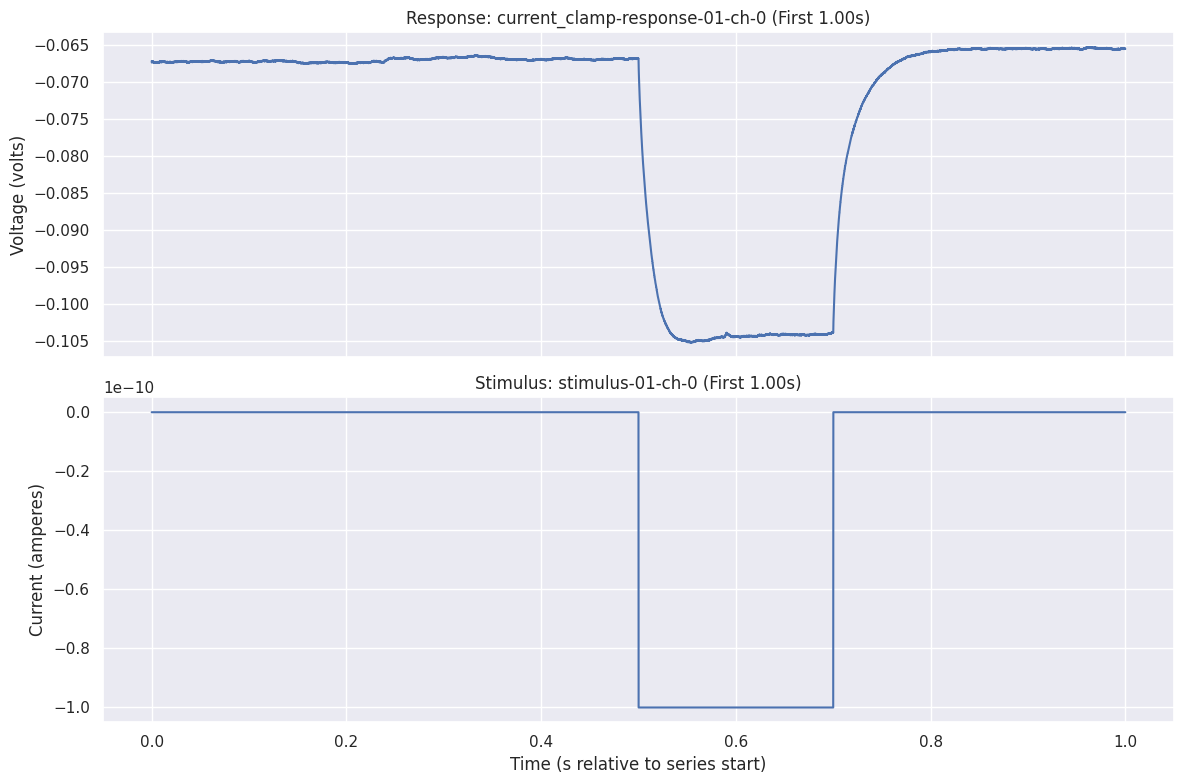

In [6]:
if nwbfile and 'current_clamp-response-01-ch-0' in nwbfile.acquisition and 'stimulus-01-ch-0' in nwbfile.stimulus:
    response_series_name = 'current_clamp-response-01-ch-0'
    stimulus_series_name = 'stimulus-01-ch-0'

    response_series = nwbfile.acquisition[response_series_name]
    stimulus_series = nwbfile.stimulus[stimulus_series_name]

    print(f"Details for Response: {response_series_name}")
    print(f"  Data shape: {response_series.data.shape}")
    print(f"  Unit: {response_series.unit}")
    print(f"  Rate (Hz): {response_series.rate}")
    print(f"  Starting time (s): {response_series.starting_time}")
    print(f"  Description: {response_series.description}")

    print(f"\nDetails for Stimulus: {stimulus_series_name}")
    print(f"  Data shape: {stimulus_series.data.shape}")
    print(f"  Unit: {stimulus_series.unit}")
    print(f"  Rate (Hz): {stimulus_series.rate}")
    print(f"  Starting time (s): {stimulus_series.starting_time}")
    print(f"  Description: {stimulus_series.description}")

    # Determine the number of data points to load (e.g., first 20000 points, which is 1 second at 20kHz)
    num_points_to_load = min(20000, response_series.data.shape[0])
    print(f"\nLoading the first {num_points_to_load} data points for visualization.")

    response_data_subset = response_series.data[:num_points_to_load]
    stimulus_data_subset = stimulus_series.data[:num_points_to_load]

    # Apply conversion and offset if they exist and are not trivial
    # Response data
    if hasattr(response_series, 'conversion') and response_series.conversion != 1.0 and response_series.conversion !=0.0 : # Added 0.0 check
        response_data_subset = response_data_subset * response_series.conversion
    if hasattr(response_series, 'offset') and response_series.offset != 0.0:
        response_data_subset = response_data_subset + response_series.offset
    
    # Stimulus data
    if hasattr(stimulus_series, 'conversion') and stimulus_series.conversion != 1.0 and stimulus_series.conversion != 0.0: # Added 0.0 check
        stimulus_data_subset = stimulus_data_subset * stimulus_series.conversion
    if hasattr(stimulus_series, 'offset') and stimulus_series.offset != 0.0:
        stimulus_data_subset = stimulus_data_subset + stimulus_series.offset

    # Create a time vector
    # Timestamps are relative to the series' starting time.
    # The actual time within the NWB file session would be series.starting_time + time_vector
    time_vector = np.arange(num_points_to_load) / response_series.rate  # Time in seconds

    # Plotting
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

    # Plot response
    axs[0].plot(time_vector, response_data_subset)
    axs[0].set_title(f'Response: {response_series_name} (First {num_points_to_load / response_series.rate:.2f}s)')
    axs[0].set_ylabel(f'Voltage ({response_series.unit})')

    # Plot stimulus
    axs[1].plot(time_vector, stimulus_data_subset)
    axs[1].set_title(f'Stimulus: {stimulus_series_name} (First {num_points_to_load / stimulus_series.rate:.2f}s)')
    axs[1].set_ylabel(f'Current ({stimulus_series.unit})')
    axs[1].set_xlabel('Time (s relative to series start)')

    plt.tight_layout()
    plt.show()

else:
    print("Required acquisition/stimulus series not found or NWB file not loaded.")

## Exploring Sweep Table Information

NWB files for intracellular electrophysiology often use "sweep tables" to organize experimental epochs. These tables help link stimuli to responses and group related recordings.
The main tables involved are:
- `nwbfile.intracellular_recordings`: Links individual stimulus and response series.
- `nwbfile.icephys_simultaneous_recordings`: Groups recordings that were acquired simultaneously (e.g., from multiple electrodes or channels for a single stimulus presentation).
- `nwbfile.icephys_sequential_recordings`: Groups sets of simultaneous recordings that form a sequence (e.g., a series of stimuli of increasing amplitude).

Let's display the content of the `icephys_sequential_recordings` table, as it often provides a high-level overview of the experimental design.

In [7]:
if nwbfile and hasattr(nwbfile, 'icephys_sequential_recordings') and nwbfile.icephys_sequential_recordings is not None:
    print("Displaying `icephys_sequential_recordings` table:")
    # Convert to pandas DataFrame for easier display
    # The table might be empty or have complex structures, so handle potential errors
    try:
        seq_rec_df = nwbfile.icephys_sequential_recordings.to_dataframe()
        # Pandas to_markdown is a good way to display tables in notebooks
        if not seq_rec_df.empty:
            print(seq_rec_df.to_markdown(index=False))
        else:
            print("  `icephys_sequential_recordings` table is empty.")
        
        # We can also list the stimulus types if the column exists
        if 'stimulus_type' in seq_rec_df.columns:
            print("\nStimulus types in this sequence:")
            for stim_type in seq_rec_df['stimulus_type'].unique():
                print(f"- {stim_type}")

    except Exception as e:
        print(f"  Could not display `icephys_sequential_recordings` table as a DataFrame: {e}")
        print("  Raw table object:", nwbfile.icephys_sequential_recordings)

    # Let's also check the `icephys_simultaneous_recordings` table for the first sequence
    if not seq_rec_df.empty:
        try:
            # Get the DynamicTableRegion for the first sequential recording
            first_sequence_simultaneous_recordings_region = nwbfile.icephys_sequential_recordings['simultaneous_recordings'][0]
            
            # Access the referenced table and indices
            simultaneous_recordings_table = first_sequence_simultaneous_recordings_region.table
            indices = first_sequence_simultaneous_recordings_region.data[:] # Get all referenced indices
            
            print("\nDisplaying referenced `icephys_simultaneous_recordings` for the first sequence:")
            # Convert the subset of the simultaneous recordings table to a DataFrame
            sim_rec_df_subset = simultaneous_recordings_table[indices].to_dataframe()
            if not sim_rec_df_subset.empty:
                print(sim_rec_df_subset.to_markdown(index=False))
                
                # Further explore the first simultaneous recording's intracellular recordings
                if 'recordings' in sim_rec_df_subset.columns and not sim_rec_df_subset['recordings'].iloc[0].table.empty:
                    first_sim_intracellular_recordings_region = sim_rec_df_subset['recordings'].iloc[0]
                    intracellular_recordings_table = first_sim_intracellular_recordings_region.table
                    ic_indices = first_sim_intracellular_recordings_region.data[:]
                    
                    print("\nDisplaying referenced `intracellular_recordings` for the first simultaneous recording of the first sequence:")
                    ic_rec_df_subset = intracellular_recordings_table[ic_indices].to_dataframe()
                    if not ic_rec_df_subset.empty:
                         print(ic_rec_df_subset.to_markdown(index=False))
                         # This table usually has columns like 'stimulus', 'response', 'electrode'
                         # which are DynamicTableRegions pointing to the actual TimeSeries and electrode objects.
                         # For example, ic_rec_df_subset['stimulus'].iloc[0].table would be nwb.stimulus
                         # and ic_rec_df_subset['stimulus'].iloc[0].data refers to the name of the series.
                    else:
                        print("  Selected subset of `intracellular_recordings` table is empty.")
            else:
                print("  Selected subset of `icephys_simultaneous_recordings` table is empty.")

        except Exception as e:
            print(f"  Could not display related sweep table information: {e}")

else:
    print("NWB file not loaded or `icephys_sequential_recordings` table not found.")

Displaying `icephys_sequential_recordings` table:


  Could not display `icephys_sequential_recordings` table as a DataFrame: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
  Raw table object: sequential_recordings pynwb.icephys.SequentialRecordingsTable at 0x132553224874192
Fields:
  colnames: ['simultaneous_recordings' 'stimulus_type']
  columns: (
    simultaneous_recordings_index <class 'hdmf.common.table.VectorIndex'>,
    simultaneous_recordings <class 'hdmf.common.table.DynamicTableRegion'>,
    stimulus_type <class 'hdmf.common.table.VectorData'>
  )
  description: A table for grouping different intracellular recording simultaneous_recordings from the SimultaneousRecordingsTable table together. This is typically used to group together simultaneous_recordings where the a sequence of stimuli of the same type with varying parameters have been presented in a sequence.
  id: id <class 'hdmf.common.table.ElementIdentifiers'>



  Could not display related sweep table information: 'DataFrame' object has no attribute 'table'


## Summary and Future Directions

This notebook demonstrated how to:
1.  Connect to the DANDI archive and retrieve metadata about Dandiset `001354`.
2.  List assets within the Dandiset.
3.  Load a specific NWB file (`sub-PK-109/.../..._icephys.nwb`) by streaming it from the DANDI archive.
4.  Inspect basic metadata and the overall structure of the NWB file, including available acquisition and stimulus series.
5.  Visualize a short segment of a current clamp response and its corresponding stimulus.
6.  Briefly explore the sweep table hierarchy (`icephys_sequential_recordings`, `icephys_simultaneous_recordings`, `intracellular_recordings`) which organizes the experimental data.

### Potential Future Directions:

*   **Systematic Sweep Analysis:** Iterate through all sweeps defined in the sweep tables to analyze responses to different stimuli or conditions. The `icephys_sequential_recordings` table often indicates the type of stimulus used for each sequence (e.g., "ramp", "step", "chirp").
*   **Feature Extraction:** For current clamp recordings, one could extract features such as spike times, action potential waveforms, firing rates, input resistance, sag voltage, etc., in response to different current injections.
*   **Comparative Analysis:** If the Dandiset contains data from different experimental conditions (e.g., different drug applications, different cell types, different PAGER configurations), compare the electrophysiological responses across these conditions. The description of this Dandiset mentions DCZ and DCZ + soluble mCherry applications, suggesting such comparisons are relevant.
*   **Correlation with Metadata:** Relate electrophysiological findings to any available cell metadata (e.g., `targeted_layer`, `inferred_layer` from `DandiIcephysMetadata` if populated, or other subject/session parameters).
*   **Advanced Visualization:** Create more sophisticated visualizations, such as plotting multiple sweeps overlaid, current-voltage (I-V) curves, or heatmaps of responses across a stimulus parameter space.

Remember that this notebook provides a starting point. The specific analyses will depend on the scientific questions being addressed. Always refer to the Dandiset's description and any accompanying publications for context on the experimental design and intended use of the data.

---
End of AI-generated notebook.

In [8]:
# Close the NWB HDF5IO object and the underlying HDF5 file if they were opened.
# This is good practice, especially for remote files.
if 'io_nwb' in locals() and io_nwb is not None:
    try:
        io_nwb.close()
        print("NWBHDF5IO object closed.")
    except Exception as e:
        print(f"Error closing NWBHDF5IO object: {e}")

if 'h5_nwb_file' in locals() and h5_nwb_file is not None:
    try:
        h5_nwb_file.close()
        print("HDF5 file (from remfile) closed.")
    except Exception as e:
        print(f"Error closing HDF5 file object: {e}")

if 'remote_nwb_file' in locals() and remote_nwb_file is not None:
    try:
        remote_nwb_file.close() # remfile.File might also need explicit closing
        print("remfile.File object closed.")
    except Exception as e:
        print(f"Error closing remfile.File object: {e}")

print("\nNotebook execution finished.")

NWBHDF5IO object closed.
HDF5 file (from remfile) closed.
remfile.File object closed.

Notebook execution finished.
